In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_name = 'train.csv'

In [5]:
mobile_data = pd.read_csv(file_name)
mobile_data.head(6)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1


In [6]:
mobile_data.shape

(2000, 21)

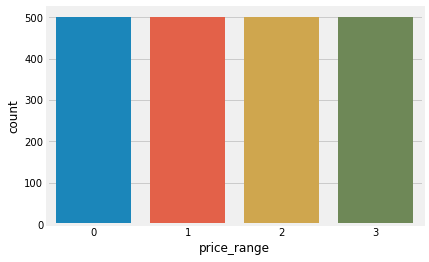

In [7]:
sns.countplot(x='price_range', data=mobile_data)
plt.show()


In [8]:
pip install missingno

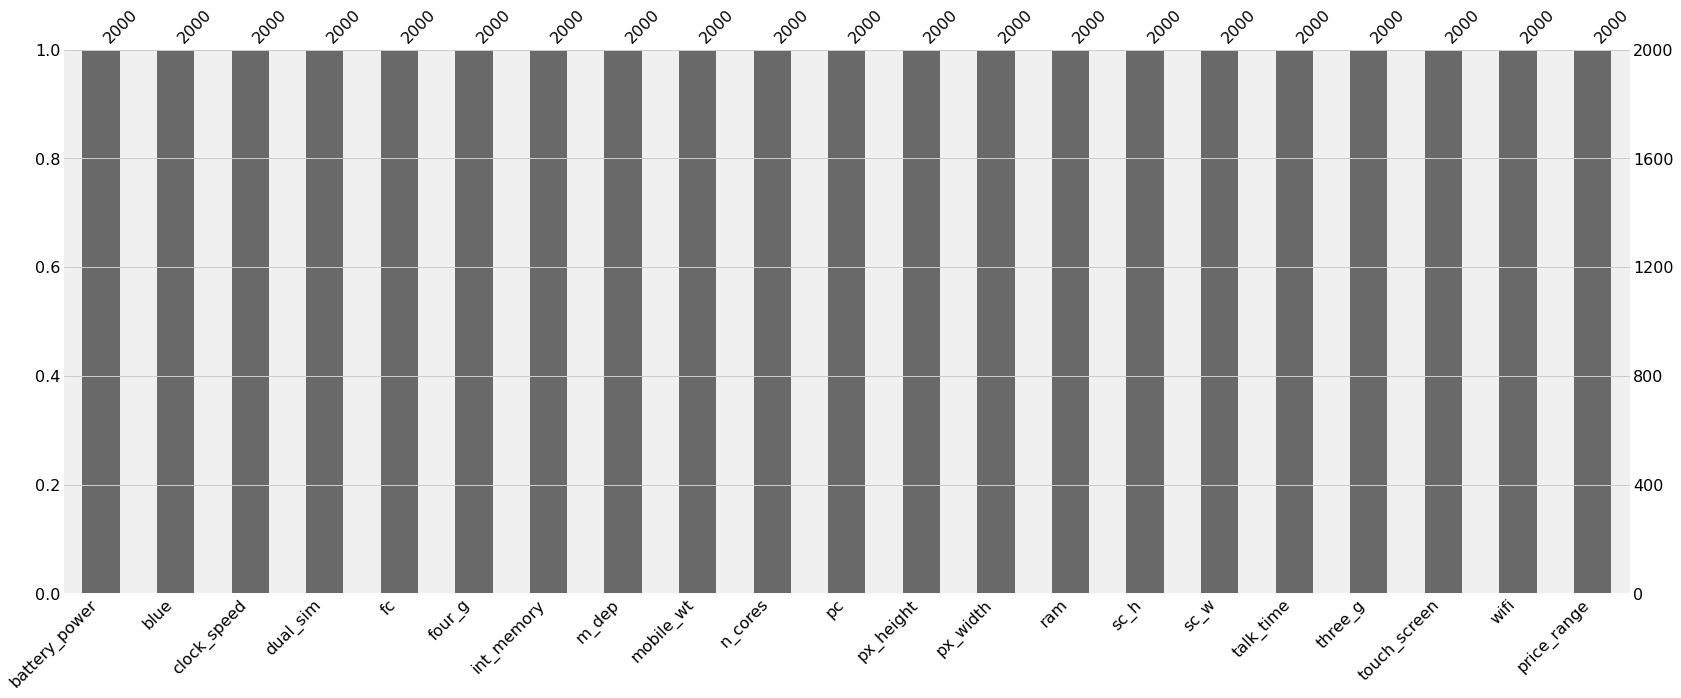

In [9]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(mobile_data)
plt.show()

In [ ]:
sns.pairplot(mobile_data,hue='price_range')

In [ ]:
sns.jointplot(x='ram',y='price_range',data=mobile_data,color='red',kind='kde');

In [ ]:
labels = ["four_g_supported",'Not supported']
values=mobile_data['four_g'].value_counts().values

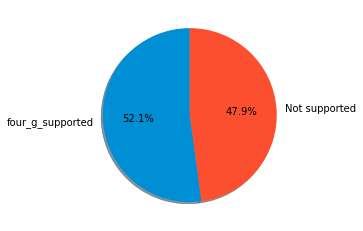

In [13]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

<AxesSubplot:title={'center':'Correlation of Features'}>

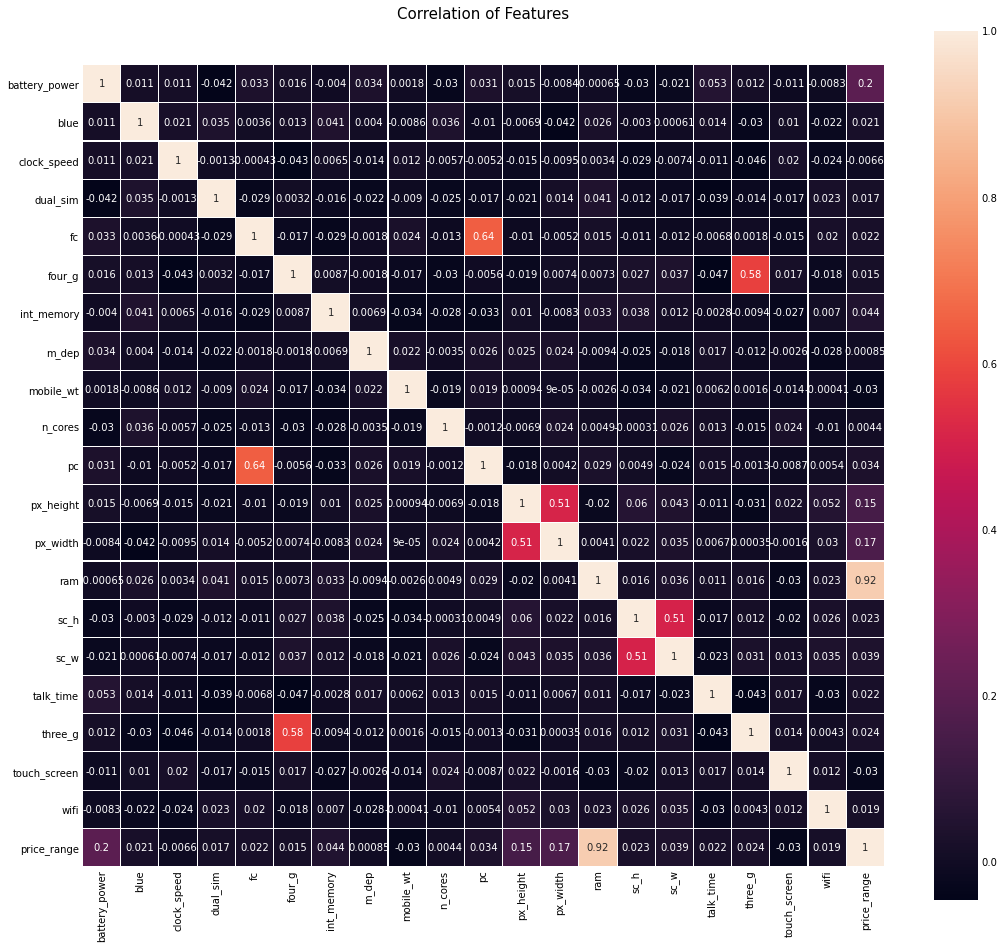

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(mobile_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

In [15]:
# df_X = mobile_data.drop('price_range',axis=1)
# df_y = mobile_data.price_range
# X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
#                                                     random_state=0,
#                                                     test_size = 0.2)

In [16]:
mobile_data['price_class']='NULL'

In [17]:
mobile_data['price_class'][mobile_data['price_range'] <= 1]='0'
mobile_data['price_class'][mobile_data['price_range'] > 1]='1'

<ipython-input-17-5d74e47dec4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_data['price_class'][mobile_data['price_range'] <= 1]='0'
<ipython-input-17-5d74e47dec4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_data['price_class'][mobile_data['price_range'] > 1]='1'


## Logistic Regression

In [18]:
df_X = mobile_data.drop(['price_class','price_range'],axis=1)
df_y = mobile_data.price_class
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                    random_state = 0,
                                                    test_size = 0.20)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_class
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,0


In [20]:
mobile_data['price_class'].value_counts()

1    1000
0    1000
Name: price_class, dtype: int64

In [21]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
print("Accuracy of test:",accuracy_score(log_reg_pred,y_test))

Accuracy of test: 0.985


In [22]:
confusion_matrix(y_test, log_reg_pred)
 
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       187
           1       0.99      0.99      0.99       213

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.draw()
    plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

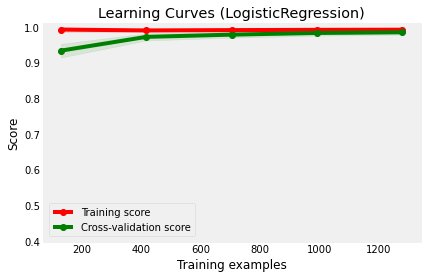

(0.9874782022663109, 0.015700562135103957)

In [24]:
title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## KNN

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                    stratify = df_y,
                                                    random_state = 0,
                                                    test_size = 0.20)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
neighbors

KNeighborsClassifier(n_neighbors=4)

In [27]:
y_hat = neighbors.predict(X_test)
y_hat[0:5]

array(['0', '0', '1', '0', '1'], dtype=object)

In [28]:
print("Accuracy of train: ", metrics.accuracy_score(y_train, neighbors.predict(X_train)))
print("Accuracy of test: ", metrics.accuracy_score(y_test, y_hat))

Accuracy of train:  0.9825
Accuracy of test:  0.9575


In [29]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neighbors = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat=neighbors.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

mean_acc

array([0.9575, 0.95  , 0.96  , 0.9575, 0.97  , 0.9675, 0.97  , 0.965 ,
       0.965 ])

In [30]:
print( "The best accuracy of", mean_acc.max(), "was measured with k=", mean_acc.argmax()+1) 

The best accuracy of 0.97 was measured with k= 5


In [31]:
confusion_matrix(y_test, y_hat)
 
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       200
           1       0.98      0.94      0.96       200

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



In [32]:
roc_auc_score(y_test, y_hat)

0.965

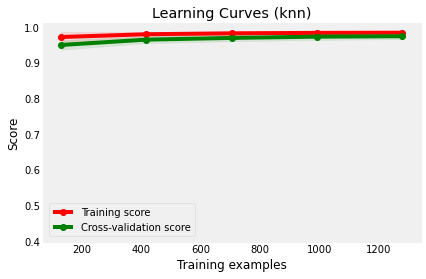

(0.9773158360737504, 0.020665579646572563)

In [33]:
title = "Learning Curves (knn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size = 0.2,
                                                   random_state = 0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train
                          )
X_test = scaler.transform(X_test)

In [35]:
nb_model = GaussianNB().fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
#print("Accuracy of train:",nb_model.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(nb_pred,y_test))

Accuracy of test: 0.9325


In [36]:
#predictions
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       187
           1       0.93      0.94      0.94       213

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



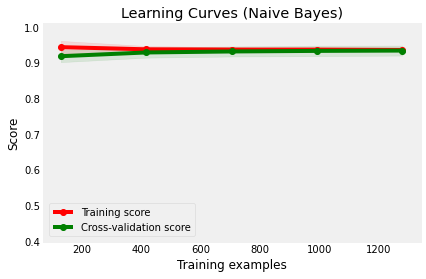

(0.9306738357996898, 0.019307086761530146)

In [37]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)


## SVC

In [38]:
from sklearn.svm import SVC

# X = df_used.drop(columns=['quality'])
# y = df_used[['quality']]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size = 0.2,
                                                   random_state = 0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train
                          )
X_test = scaler.transform(X_test)

model_SVC = SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
model_SVC.fit(X_train, y_train)

SVC(C=0.8, gamma=20)

In [39]:
pred_SVC_train = model_SVC.predict(X_train)
print("Accuracy of train:",accuracy_score(pred_SVC_train,y_train))

Accuracy of train: 1.0


In [40]:
pred_SVC = model_SVC.predict(X_test)
print("Accuracy of test:",accuracy_score(pred_SVC,y_test))


Accuracy of test: 0.4675


In [41]:
pred_SVC = nb_model.predict(X_test)
print(classification_report(y_test,pred_SVC))


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       187
           1       0.93      0.94      0.94       213

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



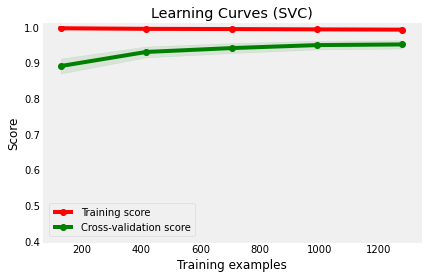

(0.9680875830062381, 0.05452307235435494)

In [42]:
title = "Learning Curves (SVC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)